In [ ]:
import numpy as np
import pandas as pd
import scipy
import math
import random
import sklearn
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from math import sqrt
import matplotlib.pyplot as plt
!pip install surprise
from surprise import accuracy, Dataset, Reader, NormalPredictor, BaselineOnly, KNNBasic, KNNWithMeans, KNNBaseline, KNNWithZScore, SVD, SVDpp, NMF, SlopeOne, CoClustering
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.model_selection import train_test_split as tts
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import warnings; warnings.simplefilter('ignore')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from os import path
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RECOMMENDER/cosmetics.csv')

In [ ]:
df.head()

,Unnamed: 0,Buyer_name,Shade,Nature,Eye,Hair_hue,Stars,Review,Item,Retailer,...,Oily,Sensitive,Item_type,Item_Url,Buyer_id,Item_id,Ingredients_Cleaned,Review_Cleaned,Worth,Ing_Tfidf
0,0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8649 non-null   int64  
 1   Buyer_name           8649 non-null   object 
 2   Shade                8649 non-null   object 
 3   Nature               8649 non-null   object 
 4   Eye                  8649 non-null   object 
 5   Hair_hue             8649 non-null   object 
 6   Stars                8649 non-null   int64  
 7   Review               8649 non-null   object 
 8   Item                 8649 non-null   object 
 9   Retailer             8649 non-null   object 
 10  Cost                 8649 non-null   int64  
 11  Rating               8649 non-null   float64
 12  Ingredients          8649 non-null   object 
 13  Combination          8649 non-null   int64  
 14  Dry                  8649 non-null   int64  
 15  Normal               8649 non-null   i

In [ ]:
df.copy()

,Unnamed: 0,Buyer_name,Shade,Nature,Eye,Hair_hue,Stars,Review,Item,Retailer,...,Oily,Sensitive,Item_type,Item_Url,Buyer_id,Item_id,Ingredients_Cleaned,Review_Cleaned,Worth,Ing_Tfidf
0,0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,8698,Tinkfairy,Fair,Combination,Hazel,Brunette,5,I was looking for a overnight serum with retin...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3127,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['wa', 'looking', 'overnight', 'serum', 'retin...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8645,8699,baeyonce,Light,Combination,Blue,Blonde,5,I have never experienced such fast results in ...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3616,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['never', 'experienced', 'fast', 'result', 'li...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8646,8700,JustJC,Dark,Combination,Brown,Black,5,Holy grail product for me! Everyone can tell w...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1464,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['holy', 'grail', 'everyone', 'tell', 'using']",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8647,8701,Latchmi,No data,No data,No data,No data,5,I love this product very much. Very much ! Exp...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1733,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['love', 'much', 'much', 'expensive', 'amazing...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."


**DATA CLEANING**

In [ ]:
df.drop(columns=df.columns[0], inplace=True)
df.drop(columns=df.columns[22], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Buyer_name           8649 non-null   object 
 1   Shade                8649 non-null   object 
 2   Nature               8649 non-null   object 
 3   Eye                  8649 non-null   object 
 4   Hair_hue             8649 non-null   object 
 5   Stars                8649 non-null   int64  
 6   Review               8649 non-null   object 
 7   Item                 8649 non-null   object 
 8   Retailer             8649 non-null   object 
 9   Cost                 8649 non-null   int64  
 10  Rating               8649 non-null   float64
 11  Ingredients          8649 non-null   object 
 12  Combination          8649 non-null   int64  
 13  Dry                  8649 non-null   int64  
 14  Normal               8649 non-null   int64  
 15  Oily                 8649 non-null   i

In [ ]:
print(df.Retailer.unique())
print('Total number of Retailers: ',len(df.Retailer.unique()))

['YOUTH TO THE PEOPLE' 'SEPHORA COLLECTION' 'PHILOSOPHY' 'DRUNK ELEPHANT'
 'TATCHA' 'FRESH' 'CLINIQUE' 'LANCÔME' 'OLEHENRIKSEN' 'CAUDALIE'
 'SHISEIDO' 'KATE SOMERVILLE' 'ORIGINS' "KIEHL'S SINCE 1851" 'KORRES'
 'INDIE LEE' 'BELIF' 'LA MER' 'BAREMINERALS' 'FIRST AID BEAUTY'
 'BOBBI BROWN' 'TARTE' 'DR. JART+' 'BIOSSANCE' 'PETER THOMAS ROTH'
 'JOSIE MARAN' 'PERRICONE MD' 'GLAMGLOW' 'AMOREPACIFIC' 'LANEIGE'
 'REN CLEAN SKINCARE' 'MURAD' 'HERBIVORE' 'CHARLOTTE TILBURY' 'SMASHBOX'
 'ESTÉE LAUDER' 'MILK MAKEUP' 'DR. DENNIS GROSS SKINCARE' 'KOPARI'
 'SATURDAY SKIN' 'ALGENIST' 'BOSCIA' 'SK-II' 'GLOW RECIPE'
 'MAKE UP FOR EVER' 'EVE LOM' 'FARMACY' 'JACK BLACK' 'SUNDAY RILEY'
 'KOH GEN DO' 'CLARINS' 'LANCER' 'NUFACE' 'VOLITION BEAUTY' 'DIOR'
 'PEACE OUT' 'FARSÁLI' 'BECCA' 'IT COSMETICS' 'GUERLAIN']
Total number of Retailers:  60


In [ ]:
print(df.Item.unique())
print('Total number of Items: ',len(df.Item.unique()))

['Superfood Antioxidant Cleanser' 'Cleansing & Exfoliating Wipes'
 'Purity Made Simple Cleanser' 'Beste™ No. 9 Jelly Cleanser'
 'The Rice Polish Foaming Enzyme Powder'
 'Rose Deep Hydration Facial Toner' 'Take The Day Off Cleansing Balm'
 'Bi-Facil Double-Action Eye Makeup Remover'
 'Balancing Force™ Oil Control Toner' 'Beauty Elixir'
 'Waterproof Eye Makeup Remover'
 'Take The Day Off Makeup Remover For Lids, Lashes & Lips' 'Facial Cotton'
 'ExfoliKate® Cleanser Daily Foaming Wash'
 'Checks and Balances™ Frothy Face Wash'
 'Calendula Herbal Extract Alcohol Free Toner'
 'The Clean Truth™ Foaming Cleanser' 'Transforming Walnut Scrub'
 'Greek Yoghurt Foaming Cream Cleanser' 'CoQ-10 Toner'
 'Brightening Cleanser' 'The True Cream Aqua Bomb'
 'The Moisturizing Soft Cream' 'The True Cream Moisturizing Bomb'
 'COMPLEXION RESCUE™ Tinted Moisturizer Broad Spectrum SPF 30'
 'Lotus Youth Preserve Moisturizer'
 'Ultra Repair® Cream Intense Hydration'
 'Moisture Surge 72-Hour Auto-Replenishing Hydr

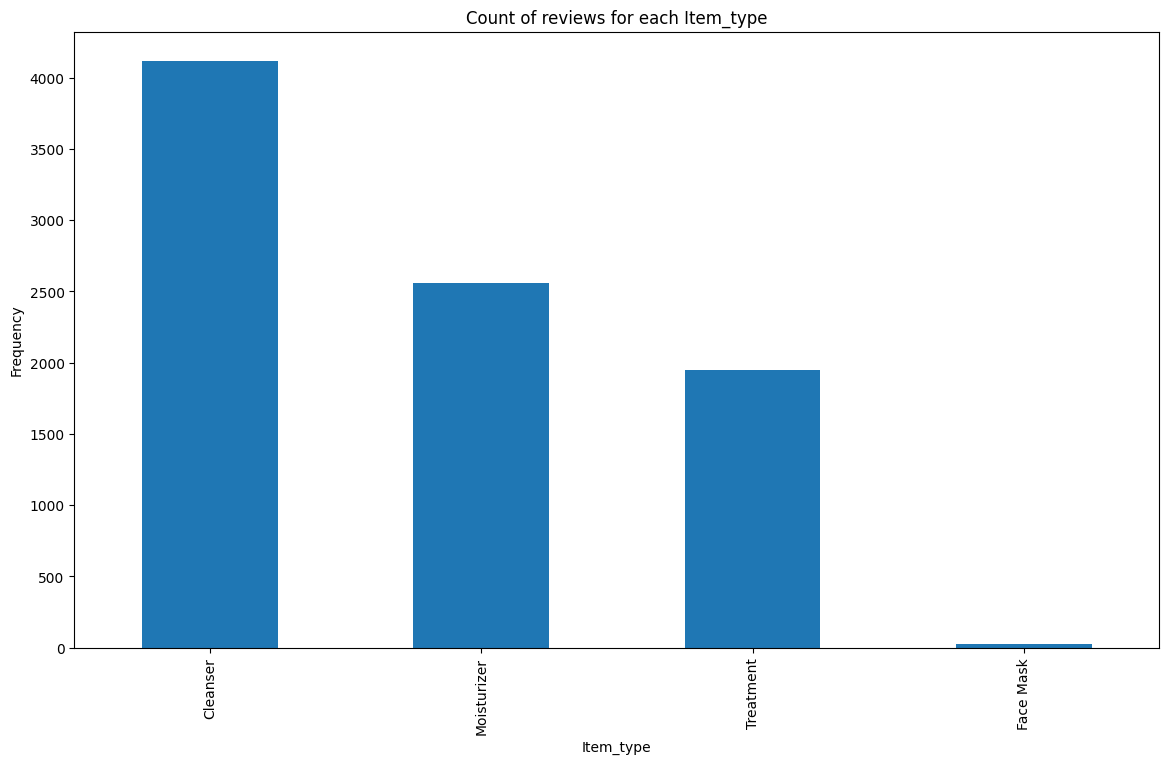

In [ ]:
ax = df['Item_type'].value_counts().plot(kind='bar', figsize=(14,8), title="Count of reviews for each Item_type")
ax.set_xlabel("Item_type")
ax.set_ylabel("Frequency")
plt.show()

In [ ]:
print(df.Item_type.unique())
print('Total number of categories: ',len(df.Item_type.unique()))

['Cleanser' 'Moisturizer' 'Face Mask' 'Treatment']
Total number of categories:  4


In [ ]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [ ]:
df['Shade'].replace({"No data":None}, inplace=True)
df['Nature'].replace({"No data":None}, inplace=True)
df['Eye'].replace({"No data":None}, inplace=True)
df['Hair_hue'].replace({"No data":None}, inplace=True)

In [ ]:
print(df.Shade.unique())
print(df.Nature.unique())
print(df.Eye.unique())
print(df.Hair_hue.unique())

['Medium' None 'Fair' 'Porcelain' 'Tan' 'Light' 'Olive' 'Deep' 'Dark'
 'Ebony']
['Combination' None 'Dry' 'Normal' 'Oily']
['Brown' None 'Blue' 'Green' 'Hazel' 'Gray']
['Brunette' 'Red' None 'Blonde' 'Black' 'Auburn' 'Gray']


In [ ]:
df.isna().sum()

Buyer_name                0
Shade                  1806
Nature                 1810
Eye                    1789
Hair_hue               1798
Stars                     0
Review                    0
Item                      0
Retailer                  0
Cost                      0
Rating                    0
Ingredients               0
Combination               0
Dry                       0
Normal                    0
Oily                      0
Sensitive                 0
Item_type                 0
Item_Url                  0
Buyer_id                  0
Item_id                   0
Ingredients_Cleaned       0
Worth                     0
Ing_Tfidf                 0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

Buyer_name             0
Shade                  0
Nature                 0
Eye                    0
Hair_hue               0
Stars                  0
Review                 0
Item                   0
Retailer               0
Cost                   0
Rating                 0
Ingredients            0
Combination            0
Dry                    0
Normal                 0
Oily                   0
Sensitive              0
Item_type              0
Item_Url               0
Buyer_id               0
Item_id                0
Ingredients_Cleaned    0
Worth                  0
Ing_Tfidf              0
dtype: int64

In [ ]:
df['Cost'] = df['Cost'].astype('float')
df['Rating'] = df['Rating'].astype('float')

df['Buyer_id'] = df['Buyer_id'].astype('int')
df['Item_id'] = df['Item_id'].astype('int')
df['Stars'] = df['Stars'].astype('int')

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Buyer_name           5679 non-null   object 
 1   Shade                5679 non-null   object 
 2   Nature               5679 non-null   object 
 3   Eye                  5679 non-null   object 
 4   Hair_hue             5679 non-null   object 
 5   Stars                5679 non-null   int64  
 6   Review               5679 non-null   object 
 7   Item                 5679 non-null   object 
 8   Retailer             5679 non-null   object 
 9   Cost                 5679 non-null   float64
 10  Rating               5679 non-null   float64
 11  Ingredients          5679 non-null   object 
 12  Combination          5679 non-null   int64  
 13  Dry                  5679 non-null   int64  
 14  Normal               5679 non-null   int64  
 15  Oily                 5679 non-null   i

**EDA**

<Axes: xlabel='Shade'>

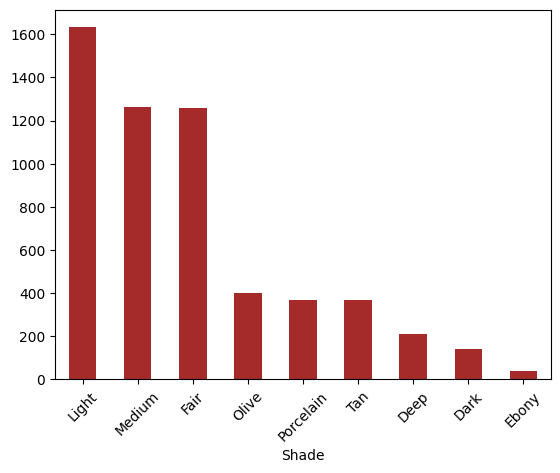

In [ ]:
skintone_stats = df.groupby('Shade')['Buyer_name'].count().sort_values(ascending=False)
skintone_stats.plot.bar(color = 'brown', rot=45)

<Axes: xlabel='Nature'>

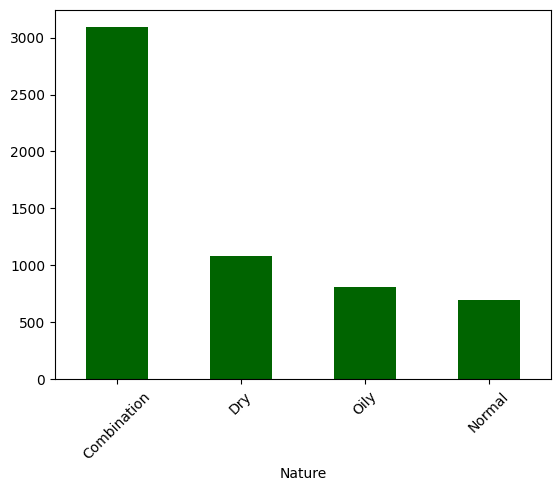

In [ ]:
skintype_stats = df.groupby('Nature')['Buyer_name'].count().sort_values(ascending=False)
skintype_stats.plot.bar(color = 'darkgreen', rot=45)

<Axes: xlabel='Eye'>

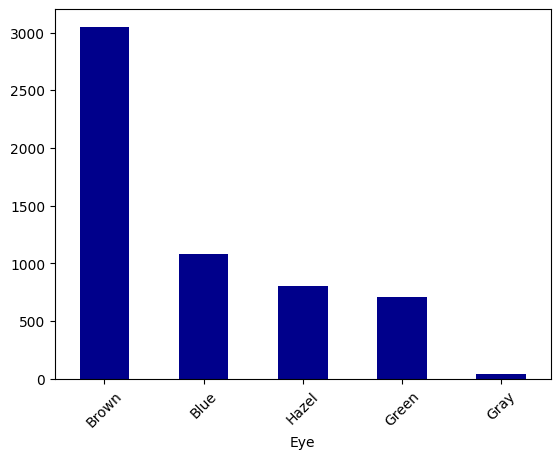

In [ ]:
eyecolor_stats = df.groupby('Eye')['Buyer_name'].count().sort_values(ascending=False)
eyecolor_stats.plot.bar(color = 'darkblue', rot=45)

<Axes: xlabel='Hair_hue'>

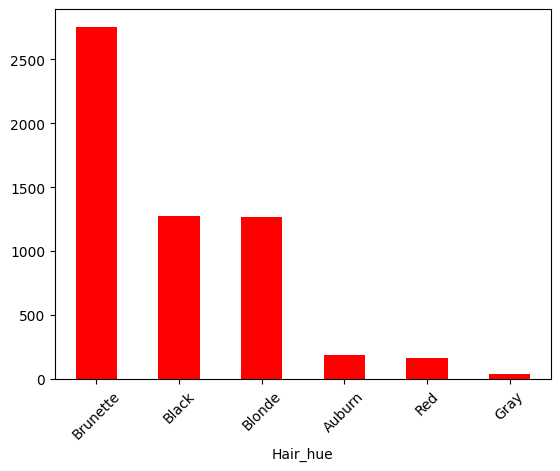

In [ ]:
haircolor_stats = df.groupby('Hair_hue')['Buyer_name'].count().sort_values(ascending=False)
haircolor_stats.plot.bar(color = 'red', rot=45)

<Axes: xlabel='Stars'>

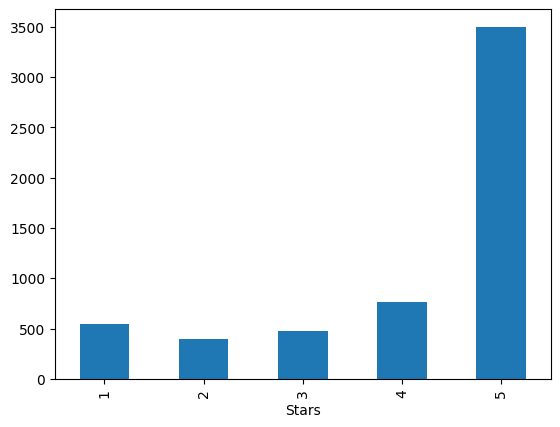

In [ ]:
rating_stats = df.groupby('Stars')['Buyer_name'].count()
rating_stats.plot.bar()





**NLP : WORD CLOUD**

In [ ]:
negative_df = df[df.Stars < 4]
positive_df = df[df.Stars >= 4]
negative = " ".join(review for review in negative_df.Review)
positive = " ".join(review for review in positive_df.Review)

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'Item'])

In [ ]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

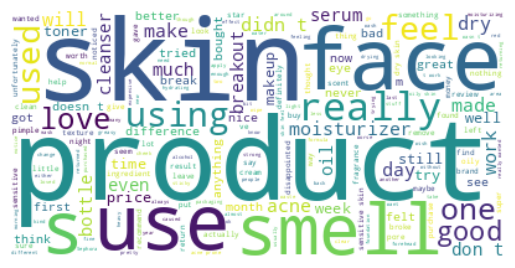

In [ ]:
generate_wordcloud(negative)

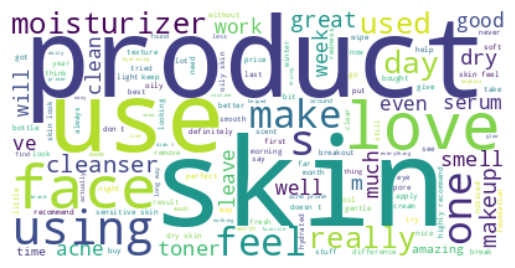

In [ ]:
generate_wordcloud(positive)

In [ ]:
cleanser_df = df[df.Item_type == 'Cleanser']
treatment_df = df[df.Item_type == 'Treatment']
moisturizer_df = df[df.Item_type == 'Moisturizer']
facemask_df = df[df.Item_type == 'Face Mask']

cleanser = " ".join(ing for ing in cleanser_df.Ingredients)
treatment = " ".join(ing for ing in treatment_df.Ingredients)
moisturizer = " ".join(ing for ing in moisturizer_df.Ingredients)
facemask = " ".join(ing for ing in facemask_df.Ingredients)

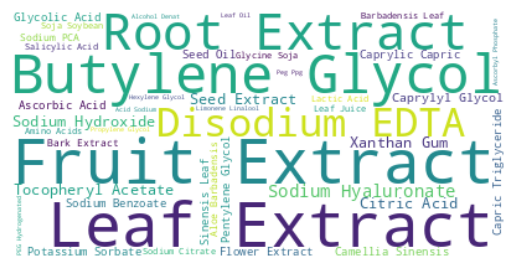

In [ ]:
generate_wordcloud(treatment)

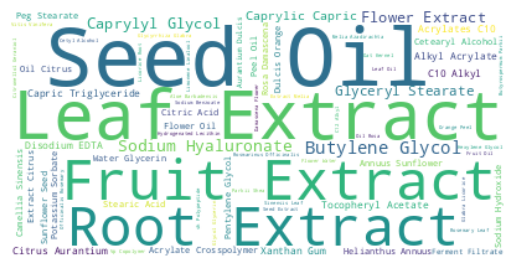

In [ ]:
generate_wordcloud(moisturizer)

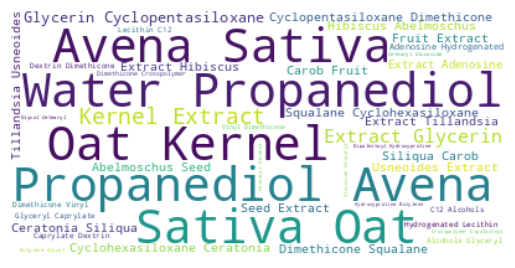

In [ ]:
generate_wordcloud(facemask)

In [ ]:
df['Stars'].unique()

array([5, 1, 4, 3, 2])

**CLASSIFICATION MODEL**

In [ ]:
X = df.Ingredients
y = df.Item_type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
categories = ['Moisturizer', 'Cleanser', 'Face Mask', 'Treatment']

**NAIVE BAYES**

In [ ]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9612676056338029
              precision    recall  f1-score   support

 Moisturizer       0.96      0.99      0.97       641
    Cleanser       0.00      0.00      0.00         2
   Face Mask       0.99      0.96      0.97       430
   Treatment       0.94      0.92      0.93       347

    accuracy                           0.96      1420
   macro avg       0.72      0.72      0.72      1420
weighted avg       0.96      0.96      0.96      1420






**LOGISTIC REGRESSION**

In [ ]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9859154929577465
              precision    recall  f1-score   support

 Moisturizer       0.98      0.98      0.98       641
    Cleanser       1.00      1.00      1.00         2
   Face Mask       1.00      0.98      0.99       430
   Treatment       0.97      0.99      0.98       347

    accuracy                           0.99      1420
   macro avg       0.99      0.99      0.99      1420
weighted avg       0.99      0.99      0.99      1420



**SGD**

In [ ]:
# SGD(stochastic gradient descent)
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9852112676056338
              precision    recall  f1-score   support

 Moisturizer       0.98      0.99      0.99       641
    Cleanser       1.00      1.00      1.00         2
   Face Mask       0.98      1.00      0.99       430
   Treatment       0.99      0.97      0.98       347

    accuracy                           0.99      1420
   macro avg       0.99      0.99      0.99      1420
weighted avg       0.99      0.99      0.99      1420






**CONTENT BASED RECOMMENDATION USING INGREDIENTS**

In [ ]:
df_cont = df[['Item', 'Item_id', 'Ingredients', 'Item_Url', 'Ing_Tfidf', 'Rating']]
df_cont.drop_duplicates(inplace=True)

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_cont['Ingredients'])

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
df_cont = df_cont.reset_index(drop=True)
titles = df_cont[['Item', 'Ing_Tfidf', 'Rating']]
indices = pd.Series(df_cont.index, index=df_cont['Item'])

In [ ]:
def content_recommendations(Item):
    idx = indices[Item]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    Item_indices = [i[0] for i in sim_scores]
    return titles.iloc[Item_indices]

In [ ]:
content_recommendations('The Rice Polish Foaming Enzyme Powder')

,Item,Ing_Tfidf,Rating
38,The Essence Plumping Skin Softener,"saccharomyces, camellia, sinensis, leaf, clado...",4.4
90,Gold Camellia Beauty Oil,"caprylic, capric, triglyceride, ethylhexyl, pa...",4.6
108,Purifying Cleansing Gel,"hydrogenated, starch, hydrolysate, diglycerin,...",4.5
165,Clear Complexion Cleanser,"hydrogenated, starch, hydrolysate, disodium, c...",4.4
43,Luminous Dewy Skin Mist,"glycerin, squalane, olive, origin, cyclopentas...",4.0
115,EradiKate® Daily Cleanser Acne Treatment,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.3
135,Detoxifying Black Charcoal Cleanser,"glycereth, glycerin, sodium, cocoyl, glutamate...",4.3
307,Breakout Fighters,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.0
217,United State™ Balancing Tonic,"lavandula, angustifolia, lavender, flower, ext...",4.3
276,GenOptics Aura Essence Serum,"galactomyces, ferment, filtrate, pitera, niaci...",4.1


In [ ]:
content_recommendations('The Essence Plumping Skin Softener')

,Item,Ing_Tfidf,Rating
4,The Rice Polish Foaming Enzyme Powder,"microcrystalline, cellulose, oryza, sativa, ri...",4.4
78,Vintage Single Extract Essence,"propanediol, glycerin, camellia, sinensis, lea...",4.5
278,Luminous Deep Hydration Firming Serum,"glycerin, propanediol, chondrus, crispus, red,...",3.8
259,Squalane + Phyto-Retinol Serum,"squalane, niacinamide, sodium, acrylate, copol...",4.3
215,Matcha Toner,"butylene, glycol, bi, peg, methyl, ether, dime...",3.7
178,Dermaclear™ Micro Water,"butylene, glycol, dipropylene, glycol, peg, ca...",4.4
60,Nutrient-Charged Water Gel,"dimethicone, glycerin, propanediol, saccharide...",4.6
187,Problem Solution Toner,"dipropylene, glycol, butylene, glycol, hexaned...",4.3
286,Water Drench Hyaluronic Cloud Serum,"saccharide, isomerate, sodium, hyaluronate, so...",4.2
37,Water Drench Hyaluronic Cloud Cream,"glycerin, cyclopentasiloxane, dipropylene, gly...",4.4


:**RECOMMENDER THAT USES ONLY CUSTOMER FEATURES TO RECOMMEND THE ITEMS**

In [ ]:
def recommend_Items_by_user_features(skintone, skintype, eyecolor, haircolor,category, percentile=0.85):
    ddf = df[(df['Shade'] == skintone) & (df['Hair_hue'] == haircolor) & (df['Nature'] == skintype) & (df['Eye'] == eyecolor)]
    recommendations = ddf[(ddf['Stars'].notnull())][['Stars', 'Item_Url','Item_type','Retailer', 'Item']]
    recommendations = recommendations.sort_values('Stars', ascending=False).head(10)
    return recommendations

In [ ]:
recommend_Items_by_user_features('Light', 'Combination', 'Green', 'Brunette','Cleanser')

,Stars,Item_Url,Item_type,Retailer,Item
138,5,https://www.sephora.com/product/bi-facil-doubl...,Cleanser,LANCÔME,Bi-Facil Double-Action Eye Makeup Remover
3812,5,https://www.sephora.com/product/turmeric-brigh...,Cleanser,VOLITION BEAUTY,Turmeric Brightening Polish
1929,5,https://www.sephora.com/product/purifying-clea...,Cleanser,BOSCIA,Purifying Cleansing Gel
1978,5,https://www.sephora.com/product/the-cleansing-...,Cleanser,LA MER,The Cleansing Foam
2275,5,https://www.sephora.com/product/clean-bee-ultr...,Cleanser,FARMACY,Clean Bee Ultra Gentle Facial Cleanser
139,5,https://www.sephora.com/product/bi-facil-doubl...,Cleanser,LANCÔME,Bi-Facil Double-Action Eye Makeup Remover
2753,5,https://www.sephora.com/product/eudermine-revi...,Moisturizer,SHISEIDO,Eudermine Revitalizing Essence
3016,5,https://www.sephora.com/product/black-charcoal...,Cleanser,BOSCIA,Black Charcoal Blotting Linens
3100,5,https://www.sephora.com/product/the-method-cle...,Cleanser,LANCER,The Method: Cleanse
3298,5,https://www.sephora.com/product/essential-powe...,Cleanser,LANEIGE,Essential Power Skin Toner for Normal to Dry Skin


**COLLABORATIVE FILTERING WITH LIGHTFM**

In [ ]:
!pip install lightfm
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k,recall_at_k

In [ ]:
def create_interaction_matrix(df, user_col, item_col, rating_col, norm= False, threshold = None):
    interactions = df.groupby([user_col, item_col])[rating_col].sum().unstack().reset_index().fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

In [ ]:
interaction_matrix = create_interaction_matrix(df=df, user_col='Buyer_id', item_col = 'Item_id', rating_col='Stars')
interaction_matrix.head()

Item_id,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,314
Buyer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    train_auc = auc_score(model, x, num_threads=n_jobs).mean()
    print('Collaborative filtering AUC: %s' % train_auc)
    print("Train precision: %.4f" % precision_at_k(model, x, k=k,num_threads=n_jobs).mean())

    return model

In [ ]:
mf_model = runMF(interactions = interaction_matrix,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

Collaborative filtering AUC: 0.9999999
Train precision: 0.0722


In [ ]:
def create_user_dict(interactions):
    Buyer_id = list(interactions.index)
    user_dict = {}
    counter = 0
    for i in Buyer_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

In [ ]:
user_dict = create_user_dict(interaction_matrix)

In [ ]:
def create_item_dict(df, id_col, name_col):
    item_dict ={}
    for i in df.index:
        item_dict[(df.loc[i, id_col])] = df.loc[i, name_col]
    return item_dict

In [ ]:
Item_dict = create_item_dict(df = df, id_col = 'Item_id', name_col = 'Item')

In [ ]:
def sample_recommendation_user(model, interactions, Buyer_id, user_dict,
                               item_dict, threshold = 0, nrec_items = 10, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[Buyer_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[Buyer_id,:] \
                                 [interactions.loc[Buyer_id,:] > threshold].index).sort_values(ascending=False))
    #print(scores)
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    #print(return_score_list)
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))

    if show == True:
        print(scores)

    return scores

In [ ]:
rec_list = sample_recommendation_user(model = mf_model,
                                      interactions = interaction_matrix,
                                      Buyer_id = 4791,
                                      user_dict = user_dict,
                                      item_dict = Item_dict,
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

['Rose Deep Hydration Face Serum', 'Calendula Deep Clean Foaming Face Wash', 'Skin Rescue Acne Clearing Pads with White Clay', 'Creamy Cleansing Foam Moist', 'Ultra Facial Cream SPF 30', 'Rose Deep Hydration Facial Toner', 'Therapeutic Sulfur Mask Acne Treatment Mask', '3% Glycolic Solutions Cleanser', 'Vitamin Nectar Antioxidant Face Mist', 'Facial Radiance Pads']


 **Popularity Based Recommendation**


In [ ]:
df_pb_rec = df.copy()

In [ ]:
df_pb_rec["Item_and_Retailer"] = df_pb_rec["Item"] + " from " + df_pb_rec["Retailer"]

In [ ]:
df_pb_rec['Item'].nunique()

315

In [ ]:
top_Items_of_all_time = pd.DataFrame(df_pb_rec.groupby('Item_and_Retailer')['Stars'].mean()
                                            .sort_values(ascending=False))

In [ ]:
pb_rec = top_Items_of_all_time.merge(df_pb_rec,on='Item_and_Retailer')
pb_rec.drop_duplicates(subset=['Item_id'],inplace=True)

final_pb_rec = pb_rec[['Item_type','Item', 'Retailer','Stars_x','Cost','Ingredients','Item_Url']]
final_pb_rec.rename(columns = {'Stars_x':'Average Rating Stars'}, inplace = True)
final_pb_rec.rename(columns = {'Cost':'Cost (USD)'}, inplace = True)


final_pb_rec.sort_values(by=['Average Rating Stars'], inplace=True, ascending=False)
final_pb_rec = final_pb_rec.reset_index(drop=True)

In [ ]:
final_pb_rec.head(10)

,Item_type,Item,Retailer,Average Rating Stars,Cost (USD),Ingredients,Item_Url
0,Cleanser,Cleansing Spa Water Makeup Remover,KOH GEN DO,4.916667,46.0,"Water, Dipropylene Glycol, Peg-7 Glyceryl Coco...",https://www.sephora.com/product/cleansing-spa-...
1,Moisturizer,Vine[activ] Overnight Detox Oil,CAUDALIE,4.888889,50.0,"Caprylic/Capric Triglyceride, Vitis Vinifera (...",https://www.sephora.com/product/vine-activ-ove...
2,Cleanser,Face Buff Energizing Scrub,JACK BLACK,4.866667,18.0,Visit the Jack Black boutique,https://www.sephora.com/product/face-buff-ener...
3,Cleanser,Mattifying Blotting Films,SEPHORA COLLECTION,4.857143,8.0,No Info,https://www.sephora.com/product/mattifying-blo...
4,Treatment,Rapid Collagen Infusion,MURAD,4.833333,84.0,"Water, Isodecyl Neopentanoate, Polymethylsilse...",https://www.sephora.com/product/rapid-collagen...
5,Cleanser,Umbrian Clay Pore Purifying Face Exfoliator,FRESH,4.800000,33.0,"Water, Solum Fullonum (Fuller's Earth), Kaolin...",https://www.sephora.com/product/umbrian-clay-m...
6,Moisturizer,Benefiance NutriPerfect Night Cream,SHISEIDO,4.800000,94.0,No Info,https://www.sephora.com/product/benefiance-nut...
7,Treatment,The Microdelivery Resurfacing Peel,PHILOSOPHY,4.789474,72.0,"The Microdelivery Peel Step I:\r\r\nPeg-6, Sod...",https://www.sephora.com/product/the-microdeliv...
8,Cleanser,Exfoilating Wipes - Papaya - Glow,SEPHORA COLLECTION,4.785714,7.0,No Info,https://www.sephora.com/product/exfoilating-wi...
9,Cleanser,Facial Cotton,SHISEIDO,4.777778,10.0,No Info,https://www.sephora.com/product/facial-cotton-...


In [ ]:
final_pb_rec.iloc[::-1].head(10)

,Item_type,Item,Retailer,Average Rating Stars,Cost (USD),Ingredients,Item_Url
314,Moisturizer,Rose Gold Elixir – 24k Gold Infused Beauty Oil,FARSÁLI,2.157895,54.0,"Rosa Rubiginosa (Rosehip) Seed Oil, Carthamus ...",https://www.sephora.com/product/rose-gold-elix...
313,Moisturizer,Goodnight Glow Retin-ALT Sleeping Crème,OLEHENRIKSEN,2.222222,55.0,"Water, Glycerin, Vitis Vinifera (Grape) Seed O...",https://www.sephora.com/product/goodnight-glow...
312,Moisturizer,Coconut Melt,KOPARI,2.714286,28.0,Visit the Kopari boutique,https://www.sephora.com/product/coconut-melt-P...
311,Cleanser,Ceramic Slip Cleanser,SUNDAY RILEY,2.750000,35.0,"Water, Disodium Laureth Sulfosuccinate, Octyld...",https://www.sephora.com/product/ceramic-slip-c...
310,Cleanser,Martian Mattifying Melting Water-Gel Toner,SUNDAY RILEY,2.842105,55.0,"Water, Alcohol Denat., Dicaprylyl Carbonate, D...",https://www.sephora.com/product/martian-mattif...
309,Cleanser,Blackhead Solutions Self-heating Blackhead Ext...,CLINIQUE,2.944444,29.0,"Magnesium Sulfate, Dimethicone, Isononyl Isono...",https://www.sephora.com/product/blackhead-solu...
308,Moisturizer,Wrinkle Warrior™ 2-in-1 Plumping Moisturizer +...,KATE SOMERVILLE,3.000000,95.0,"Water, Dimethicone, Propanediol, Dimethyl Isos...",https://www.sephora.com/product/wrinkle-warrio...
307,Treatment,Retinol Youth Renewal Serum,MURAD,3.000000,88.0,"Water, Cyclopentasiloxane, Isopropyl Palmitate...",https://www.sephora.com/product/retinol-youth-...
306,Moisturizer,Cold Plasma Sub-D Firming Neck Treatment,PERRICONE MD,3.066667,135.0,"Water, Glycolic Acid, L-Tyrosine, Dimethyl MEA...",https://www.sephora.com/product/cold-plasma-su...
305,Treatment,Skintune Blur Perfecting Primer Serum,FARSÁLI,3.100000,54.0,"Water, Methyl Methacrylate Crosspolymer, Dimet...",https://www.sephora.com/product/skintune-blur-...


**MULTIMODEL**

In [ ]:
# Content-Based Recommendations
def content_recommendations(item):
    # Ensure these variables are defined correctly before this function
    idx = indices[item]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return titles.iloc[item_indices].head(10)

# User-Based Recommendations
def recommend_items_by_user_features(skintone, skintype, eyecolor, haircolor):
    ddf = df[(df['Shade'] == skintone) & (df['Hair_hue'] == haircolor) & (df['Nature'] == skintype) & (df['Eye'] == eyecolor)]
    recommendations = ddf[ddf['Stars'].notnull()][['Stars', 'Item_Url', 'Item_type', 'Retailer', 'Item']]
    recommendations = recommendations.sort_values('Stars', ascending=False).head(10)
    return recommendations.head(10)





In [ ]:

# Collaborative Filtering (SVD)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Buyer_id', 'Item_id', 'Rating']], reader)
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

def collaborative_filtering_recommendations(user_id):
    # Implement code to get recommendations based on collaborative filtering using the SVD model
    # Utilize the trained model 'algo' and 'trainset' to make predictions or recommendations
    # Replace 'pass' with your code
    # Get the list of all item IDs
    all_item_ids = df['Item_id'].unique()

    # Predict ratings for all items the user hasn't rated
    user_items_rated = df[df['Buyer_id'] == user_id]['Item_id'].unique()
    items_to_predict = np.setdiff1d(all_item_ids, user_items_rated)

    # Create a list of tuples containing the item IDs and predicted ratings
    predicted_ratings = [(item_id, algo.predict(user_id, item_id).est) for item_id in items_to_predict]

    # Sort the predicted ratings in descending order
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)

    # Select the top N items as recommendations (e.g., top 10 items)
    top_n_recommendations = predicted_ratings[:10]

    # Get the details of recommended items
    recommended_items = df[df['Item_id'].isin([item[0] for item in top_n_recommendations])]

    return recommended_items[['Item', 'Item_Url', 'Item_type', 'Retailer', 'Stars']]
    return recommended_items.head(10)


In [ ]:
# Combined Recommendations Function
def get_recommendations(user_id, selected_item, user_skintone, user_skintype, user_eyecolor, user_haircolor):
    content_rec = content_recommendations(selected_item)
    user_feature_rec = recommend_items_by_user_features(user_skintone, user_skintype, user_eyecolor, user_haircolor)
    collab_filter_rec = collaborative_filtering_recommendations(user_id)

    return {
        'Content-Based': content_rec ,
        'User-Feature-Based': user_feature_rec,
        'Collaborative-Filtering': collab_filter_rec
    }

In [ ]:
# Example usage:
Buyer_id = 4497  # User's ID
selected_item = 'Superfood Antioxidant Cleanser'  # Replace with an actual item from your dataset
Shade = 'Fair'
Nature = 'Dry'
Eye = 'Blue'
Hair_hue = 'Blonde'

get_recommendations(Buyer_id, selected_item, Shade, Nature, Eye, Hair_hue)


{'Content-Based':                                             Item  \
 279  Superfood Firm and Brighten Vitamin C Serum   
 160          Deep Dive™ Glycolic Facial Cleanser   
 161            Jasmine Green Tea Balancing Toner   
 167                  8% Glycolic Solutions Toner   
 54           Pink Cloud Rosewater Moisture Crème   
 127       Clean Bee Ultra Gentle Facial Cleanser   
 208                      Hydrating Essence Toner   
 269               Max Complexion Correction Pads   
 187                       Problem Solution Toner   
 108                      Purifying Cleansing Gel   
 
                                              Ing_Tfidf  Rating  
 279  lactic, acid, citric, acid, malic, acid, glyce...     3.9  
 160  kaolin, glycerin, sodium, methyl, cocoyl, taur...     4.6  
 161  jasminum, officinale, jasmine, flower, hamamel...     4.2  
 167  glycolic, acid, alcohol, denat, methyl, glucet...     4.3  
 54   aloe, barbadensis, aloe, vera, leaf, juice, he...     4.6  
 1